In [83]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import svm
import operator as op
import math
from hmmlearn import hmm
import pickle
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("hmmlearn").setLevel("CRITICAL")

#  Training The HMM

In [84]:
#Data Sets
nstates = [2,10,50]
distribution = ["Gaussian", "Gaussian","Gaussian", "GMMHMM", "GMMHMM", "GMMHMM"]
hiddenstate = [2,10,50,2,10,50]
classfication = ["moving","not moving"]
 

df_walking = pd.read_csv('training_walking.csv', index_col=False)
data_walking =  df_walking.iloc[:, 1:60]
y_walking =df['Label']
df_notwalking = pd.read_csv('training_notwalking.csv', index_col=False)
data_notwalking =  df_notwalking.iloc[:, 1:60]
y_notwalking =df['Label']
i=0

walkingHMM = [] 
notwalkingHMM = []
for i in range(0,3):
    walkingHMM.append(hmm.GaussianHMM(n_components=nstates[i], n_iter=1).fit(data_walking))
    notwalkingHMM.append(hmm.GaussianHMM(n_components=nstates[i], n_iter=1).fit(data_notwalking))
    
for i in range(0,3):
    walkingHMM.append(hmm.GMMHMM(n_components=nstates[i], n_iter=1).fit(data_walking))
    notwalkingHMM.append(hmm.GMMHMM(n_components=nstates[i], n_iter=1).fit(data_notwalking))



#  Testing the HMM

In [85]:
df_test = pd.read_csv('blindTest.csv', index_col=False)
data_test =  df_test.iloc[:, 1:60]
y_test=df_test['Label']

i=0
HMM_predictions = []
for i in range(0,6):
    predictions = []
    walkingprob = []
    notwalkingprob = []
    notwalking_hiddenstates = []
    walking_hiddenstates = []
    states = []
    for j in range(0, len(data_test)-1):
        walkingprob.append(walkingHMM[i].score(data_test[j:j+1]))
        notwalkingprob.append(notwalkingHMM[i].score(data_test[j:j+1]))

        #print(walkingprob[i],notwalkingprob[i])
        if (walkingprob[j]) > (notwalkingprob[j]):
            predictions.append(classfication[0])#1 - walking
            states.append(1)
        else:
            predictions.append(classfication[1])#0 - ot walking
            states.append(0)
            # compare HMM predictions vs actual labels
    correct_walking = 0 #correct 
    correct_notwalking = 0 #correct
    walking_num = 0 #track of overall count
    notwalking_num = 0  #tack overall count
    predicted_walking = 0
    predicted_notwalking=0
    for k in range (0, len(predictions)):
        if y_test[k] == "not moving":
            notwalking_num +=1

            if y_test[k] == predictions[k]:
                predicted_notwalking +=1
                correct_notwalking+=1
            else:
                predicted_walking+=1
        else:
            walking_num +=1
            if y_test[k] == predictions[k]:
                correct_walking+=1
                predicted_walking+=1
            else:
                predicted_notwalking+=1
    HMM_predictions.append(predictions)
    print("----------------------------")
    print("HMM Results")
    print("Distribution: ", distribution[i])
    print("Number of Hidden States: ", hiddenstate[i])
    print("----------------------------")

    print("HMM Walking Count (Predict)", predicted_walking)       
    print("HMM Not Walking Count (Predict)", predicted_notwalking) 

    print("HMM Walking Count (Correct)", correct_walking)       
    print("HMM Not Walking Count (Correct)", correct_notwalking) 
    print("Accuraccy: ", ((correct_walking+correct_notwalking)/(walking_num+notwalking_num))*100)
    print("----------------------------")

----------------------------
HMM Results
Distribution:  Gaussian
Number of Hidden States:  2
----------------------------
HMM Walking Count (Predict) 290
HMM Not Walking Count (Predict) 986
HMM Walking Count (Correct) 288
HMM Not Walking Count (Correct) 907
Accuraccy:  93.65203761755487
----------------------------
----------------------------
HMM Results
Distribution:  Gaussian
Number of Hidden States:  10
----------------------------
HMM Walking Count (Predict) 30
HMM Not Walking Count (Predict) 1246
HMM Walking Count (Correct) 30
HMM Not Walking Count (Correct) 909
Accuraccy:  73.58934169278997
----------------------------
----------------------------
HMM Results
Distribution:  Gaussian
Number of Hidden States:  50
----------------------------
HMM Walking Count (Predict) 39
HMM Not Walking Count (Predict) 1237
HMM Walking Count (Correct) 39
HMM Not Walking Count (Correct) 909
Accuraccy:  74.29467084639498
----------------------------
----------------------------
HMM Results
Distribu

#  Graphs 

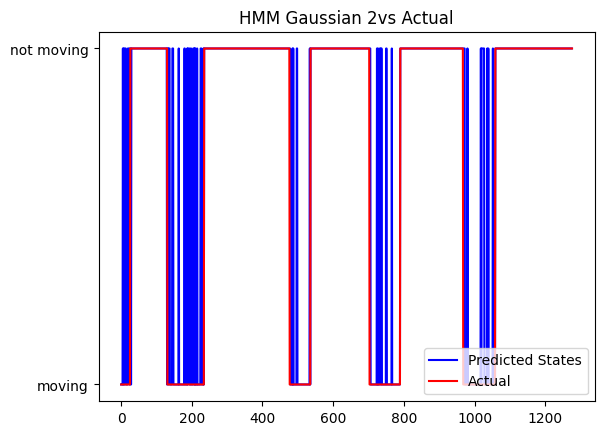

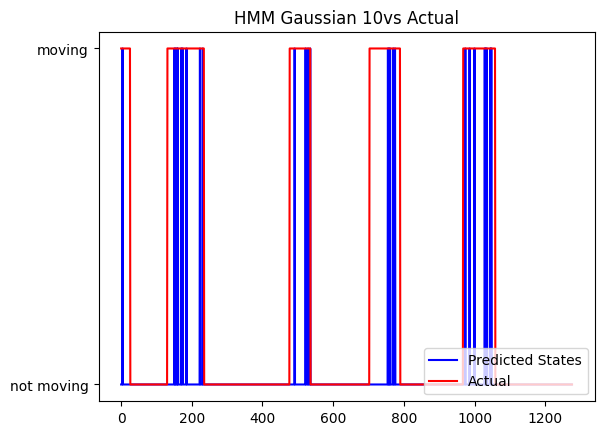

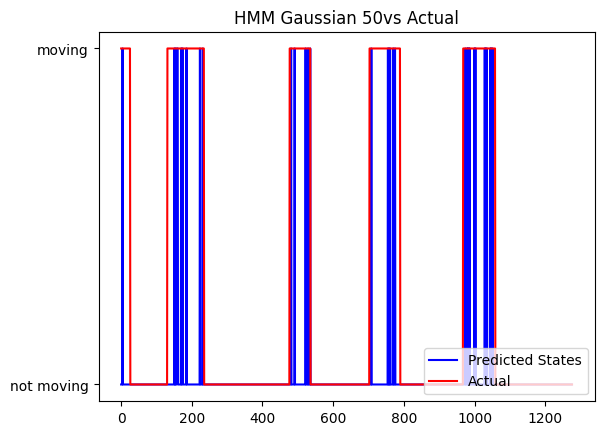

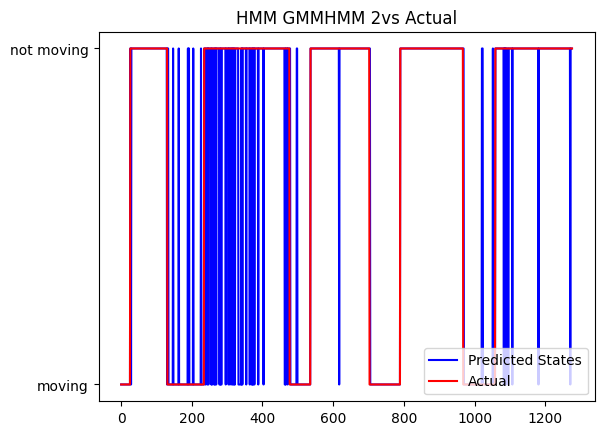

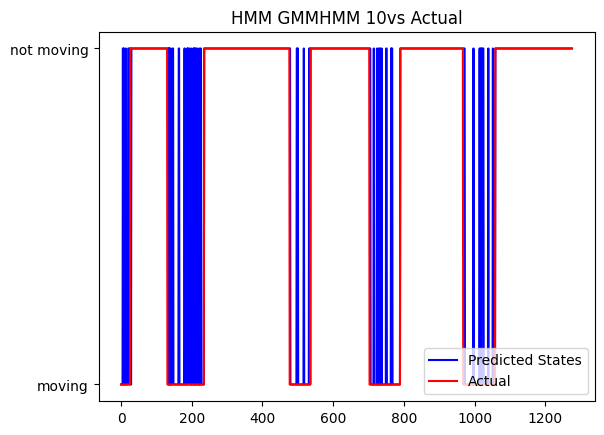

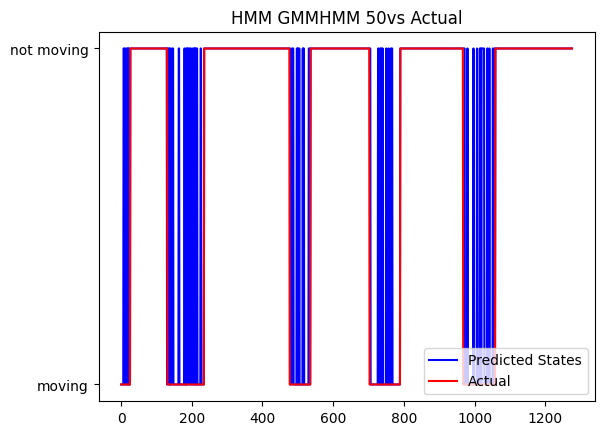

In [99]:
j=0

for i in HMM_predictions:
    y1 = i
    y2 = y_test
    
    # Plot data on each subplot
    plt.plot(y1, color='blue')
    #ax1.set_title('HMM Predicted States')

    plt.plot(y2, color='red')

    plt.legend(["Predicted States", "Actual"],loc='lower right')
    plt.title("HMM " +distribution[j] + " " + str(hiddenstate[j]) + "vs Actual")
    j+=1
    # Display the plot
    plt.show()